<a href="https://colab.research.google.com/github/sid2305/Plant-Disease-Prediction/blob/master/Plant_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/pratikkayal/PlantDoc-Dataset.git

Cloning into 'PlantDoc-Dataset'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 2658 (delta 17), reused 0 (delta 0), pack-reused 2628
Receiving objects: 100% (2658/2658), 932.25 MiB | 47.63 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Checking out files: 100% (2580/2580), done.


In [ ]:
import keras
import numpy as np
from keras.applications import InceptionResNetV2
import pprint
from matplotlib import pyplot

In [ ]:
apple_scab_leaf = 'PlantDoc-Dataset/train/Apple Scab Leaf/'
apple_leaf = 'PlantDoc-Dataset/train/Apple leaf/'
apple_rust_leaf = 'PlantDoc-Dataset/train/Apple rust leaf/'
bell_pepper_leaf = 'PlantDoc-Dataset/train/Bell_pepper leaf/'
Bell_pepper_spot = 'PlantDoc-Dataset/train/Bell_pepper leaf spot/'
blueberry_leaf = 'PlantDoc-Dataset/train/Blueberry leaf/'
cherry_leaf = 'PlantDoc-Dataset/train/Cherry leaf/'
corn_gray_leaf = 'PlantDoc-Dataset/train/Corn Gray leaf spot/'
corn_leaf_blight = 'PlantDoc-Dataset/train/Corn leaf blight'
corn_rust_leaf = 'PlantDoc-Dataset/train/Corn rust leaf/'
peach_leaf = 'PlantDoc-Dataset/train/Peach leaf/'
potato_leaf_early = 'PlantDoc-Dataset/train/Potato leaf early blight/'
potato_leaf_late = 'PlantDoc-Dataset/train/Potato leaf late blight/'
raspberry_leaf = 'PlantDoc-Dataset/train/Raspberry leaf/'
soyabean_leaf = 'PlantDoc-Dataset/train/Soyabean leaf/'
powdery_mildew_leaf = 'PlantDoc-Dataset/train/Squash Powdery mildew leaf/'
strawberry_leaf = 'PlantDoc-Dataset/train/Strawberry leaf/'
tomato_blight_leaf = 'PlantDoc-Dataset/train/Tomato Early blight leaf/'
tomato_septoria_leaf = 'PlantDoc-Dataset/train/Tomato Septoria leaf spot/'
tomato_leaf = 'PlantDoc-Dataset/train/Tomato leaf/'
tomato_leaf_bacterial = 'PlantDoc-Dataset/train/Tomato leaf bacterial spot/'
tomato_leaf_late = 'PlantDoc-Dataset/train/Tomato leaf late blight/'
tomato_mosaic_virus = 'PlantDoc-Dataset/train/Tomato leaf mosaic virus/'
tomato_yellow_virus = 'PlantDoc-Dataset/train/Tomato leaf yellow virus/'
tomato_mold_leaf = 'PlantDoc-Dataset/train/Tomato mold leaf/'
tomato_spider_mites = 'PlantDoc-Dataset/train/Tomato two spotted spider mites leaf/'
grape_leaf = 'PlantDoc-Dataset/train/grape leaf/'
grape_black_rot = 'PlantDoc-Dataset/train/grape leaf black rot/'



In [ ]:
from tqdm import tqdm
import os, shutil, cv2

def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
X = []
Z = []
imgsize = 300


training_data('Apple Scab Leaf',apple_scab_leaf)
training_data('Apple Leaf',apple_leaf)
training_data('Apple rust leaf',apple_rust_leaf)
training_data('Bell_pepper leaf',bell_pepper_leaf)
training_data('Blueberry leaf',blueberry_leaf)
training_data('Cherry leaf',cherry_leaf)
training_data('Corn Gray leaf spot',corn_gray_leaf)
training_data('Corn leaf blight',corn_leaf_blight)
training_data('Corn rust leaf',corn_rust_leaf)
training_data('Peach leaf',peach_leaf)
training_data('Potato leaf early blight',potato_leaf_early)
training_data('Potato leaf late blight',potato_leaf_late)
training_data('Raspberry leaf',raspberry_leaf)
training_data('Soyabean leaf',soyabean_leaf)
training_data('Squash Powdery mildew leaf',powdery_mildew_leaf)
training_data('Strawberry leaf',strawberry_leaf)
training_data('Tomato Early blight leaf',tomato_blight_leaf)
training_data('Tomato Septoria leaf spot',tomato_septoria_leaf)
training_data('Tomato leaf',tomato_leaf)
training_data('Tomato leaf bacterial spot',tomato_leaf_bacterial)
training_data('Tomato leaf late blight',tomato_leaf_late)
training_data('Tomato leaf mosaic virus',tomato_mosaic_virus)
training_data('Tomato leaf yellow virus',tomato_yellow_virus)
training_data('Tomato mold leaf',tomato_mold_leaf)
training_data('Tomato two spotted spider mites leaf',tomato_spider_mites)
training_data('grape leaf',grape_leaf)
training_data('grape leaf black rot',grape_black_rot)

100%|██████████| 56/56 [00:01<00:00, 37.83it/s]


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
Y = to_categorical(Y,28)
X = np.array(X)
X=X/255
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=42)

In [ ]:
Pred = list(label_encoder.classes_)
Pred

['Apple Leaf',
 'Apple Scab Leaf',
 'Apple rust leaf',
 'Bell_pepper leaf',
 'Blueberry leaf',
 'Cherry leaf',
 'Corn Gray leaf spot',
 'Corn leaf blight',
 'Corn rust leaf',
 'Peach leaf',
 'Potato leaf early blight',
 'Potato leaf late blight',
 'Raspberry leaf',
 'Soyabean leaf',
 'Squash Powdery mildew leaf',
 'Strawberry leaf',
 'Tomato Early blight leaf',
 'Tomato Septoria leaf spot',
 'Tomato leaf',
 'Tomato leaf bacterial spot',
 'Tomato leaf late blight',
 'Tomato leaf mosaic virus',
 'Tomato leaf yellow virus',
 'Tomato mold leaf',
 'Tomato two spotted spider mites leaf',
 'grape leaf',
 'grape leaf black rot']

In [ ]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)

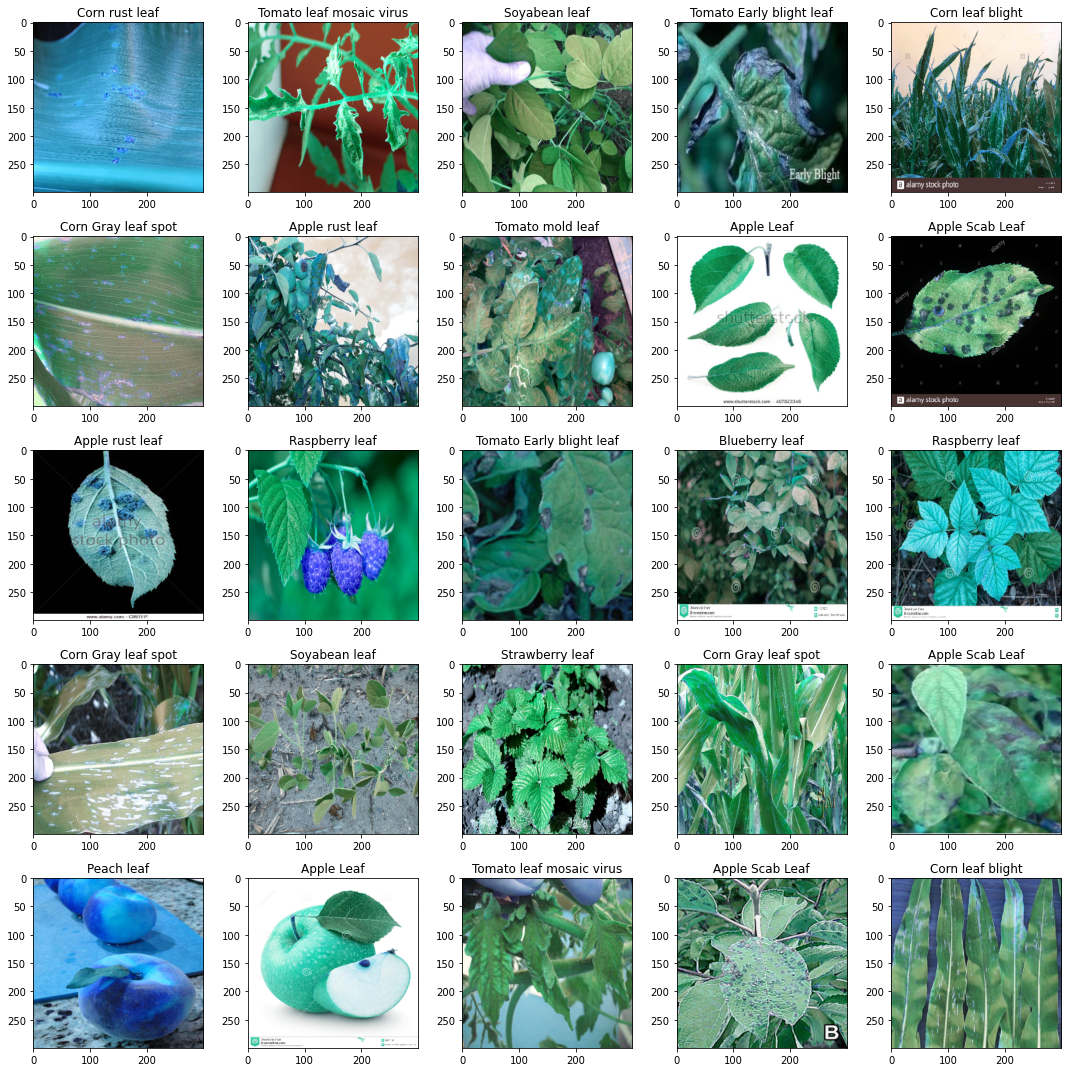

In [ ]:
import matplotlib.pyplot as plt
import random as rn
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title(Z[l])
        
plt.tight_layout()

In [ ]:
from keras.models import Sequential,Input,Model
from IPython.display import SVG
from keras.layers import Activation, Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from keras.models import load_model
#model = load_model('model.h5')
base_model = InceptionResNetV2(weights='imagenet',include_top=False,input_shape = (imgsize,imgsize,3))

for layer in base_model.layers:
    layer.trainable = False
    
# # for layer in base_model.layers:
# #     print(layer,layer.trainable)

# model = Sequential()
# model.add(base_model)
# model.add(GlobalAveragePooling2D())
# model.add(Dropout(0.5))
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(28,activation='softmax'))
# model.summary()
model = base_model
model.summary()

# SVG(model_to_dot(base_model).create(prog='dot', format='svg'))
# plot_model(base_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

219062272/219055592 [==============================] - 2s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_____________

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)
reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [ ]:
def show_final_analyser(analyser):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(analyser.epoch, analyser.analyser["loss"], label="Train loss")
    ax[0].plot(analyser.epoch, analyser.analyser["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(analyser.epoch, analyser.analyser["accuracy"], label="Train accuracy")
    ax[1].plot(analyser.epoch, analyser.analyser["val_accuracy"], label="Validation accuracy")
    ax[0].legend()
    ax[1].legend()

In [ ]:
from keras.optimizers import Adam,SGD

opt = Adam(lr=0.001)

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

analyser = model.fit_generator(
    augs_gen.flow(x_train,y_train,batch_size=32),
    validation_data  = (x_test,y_test),
    epochs = 25, 
    verbose = 1,
    callbacks=callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25


ValueError: ignored

In [ ]:
#show_final_analyser(analyser)
model.load_weights('./base.model')

model_json = model.to_json()
with open("model.json","w") as json_file:
  json_file.write(model_json)
    
model.save("model.h5")
print("Weights Saved")

Weights Saved


In [ ]:
"""
Script to train SVM classifier on image embeddings from the LeafSnap dataset.
"""
import argparse
from sklearn.svm import SVC
import models


def parse_args():
    parser = argparse.ArgumentParser(description="SVM args.")

    # Should be 'r50', 'r101', 'r152', or 'overfeat'
    parser.add_argument('-f', '--feature_extractor', default = model, type=str, required=True,
                        help='Feature extractor used to produce image embeddings')
    parser.add_argument('-k', '--kernel', type=str, default='rbf',
                        help='SVM kernel type')
    parser.add_argument('-c', '--regularization', type=float, default=1.0,
                        help='SVM regularization parameter')
    parser.add_argument('-g', '--gamma', type=str, default='scale',
                        help='SVM gamma parameter')
    parser.add_argument('-n', '--num_examples', type=int, default=1000000,
                        help='Number training examples')
    parser.add_argument('-s', '--save', default=False, action="store_true",
                        help='Save the trained SVM model.')

    return parser.parse_args()


def train(args):
    svc = SVC(C=args.regularization, kernel=args.kernel, gamma=args.gamma)
    models.train_model(svc, args.feature_extractor, args.num_examples)
    return svc


def save(svc, args):
    params = [args.feature_extractor, args.kernel, 
    str(args.regularization), args.gamma, str(args.num_examples)]
    model_name = 'svm_' + '_'.join(params)
    models.save_model(svc, model_name)


def svm():
    args = parse_args()
    print('Feature Extractor:', args.feature_extractor, 'Kernel:', args.kernel, 
    'C:', args.regularization, 'Gamma:', args.gamma, 'N:', args.num_examples)
    svc = train(args)
    if args.save:
        save(svc, args)

svm()

Blueberry leaf
Peach leaf
Apple Leaf


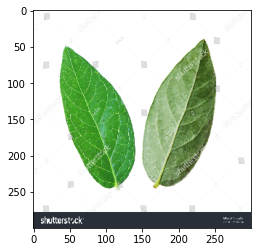

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
img = image.load_img('/content/PlantDoc-Dataset/test/Blueberry leaf/stock-photo-two-sides-of-blueberry-leaf-isolated-on-white-15582232.jpg',target_size=(300,300,3))
img = image.img_to_array(img)
img = img/255
proba = model.predict(img.reshape(1,300,300,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
  print(Pred[top_3[i]])
plt.imshow(img)